# Polyp Identification (2 Classes)

### Download and extract the Dataset. Also remove unnecessary classes.

In [1]:
!mkdir kvasir
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/ERzdk7nD_aBEgnA0NS-DlzwBjM2v0jo8iH-laBgi1YOkEg?e=JMgQXd&download=1' -O kvasir-dataset-v2.zip
!unzip /content/kvasir-dataset-v2.zip
!mv /content/content/kvasir/kvasir-dataset-v2 /content/kvasir
!rm -r kvasir/kvasir-dataset-v2/dyed-resection-margins
!rm -r kvasir/kvasir-dataset-v2/dyed-lifted-polyps
!rm -r kvasir/kvasir-dataset-v2/esophagitis
!rm -r kvasir/kvasir-dataset-v2/normal-cecum
!rm -r kvasir/kvasir-dataset-v2/normal-z-line
!rm -r kvasir/kvasir-dataset-v2/ulcerative-colitis
!rm -r /content/content

Streaming output truncated to the last 5000 lines.
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/3b77b2f5-5a77-47b9-9475-477c26ec78d7.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/195f99c7-bd05-4189-86f3-89480d1d3913.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/1b03c9ad-70b6-484f-b342-8614d5062e34.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/140670b4-221e-4149-b748-f29940067147.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/13a62adb-0941-4df7-b788-aa733e244f4f.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/760dfee6-3715-456b-ad6b-48b17db59fdd.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/4128a5ff-df5d-4b3a-9560-bd131a13526a.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/a1e1c7f8-a30f-4b4f-9d62-3d356a864229.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/b5e24486-2569-4192-9

## Verify data directories

In [2]:
!ls kvasir/kvasir-dataset-v2

normal-pylorus	polyps


In [3]:
#import libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
import os

In [4]:
#dataset path

dataset_directory = "/content/kvasir/kvasir-dataset-v2"

## Creating Random Train and Validation Splits

In [5]:
# train-test-splits
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                               labels="inferred",
                                                               image_size=(299, 299),
                                                               batch_size=16,
                                                               subset="training",
                                                               validation_split=0.2222222,
                                                               seed=123
                                                               )

validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                              labels="inferred",
                                                              image_size=(299, 299),
                                                              batch_size=16,
                                                              subset="validation",
                                                              validation_split=0.2222222,
                                                              seed=123
                                                              )

Found 1800 files belonging to 2 classes.
Using 1401 files for training.
Found 1800 files belonging to 2 classes.
Using 399 files for validation.


In [6]:
#classes labels

print(len(training_data.class_names), "Classes are:", training_data.class_names)

2 Classes are: ['normal-pylorus', 'polyps']


## Visualization

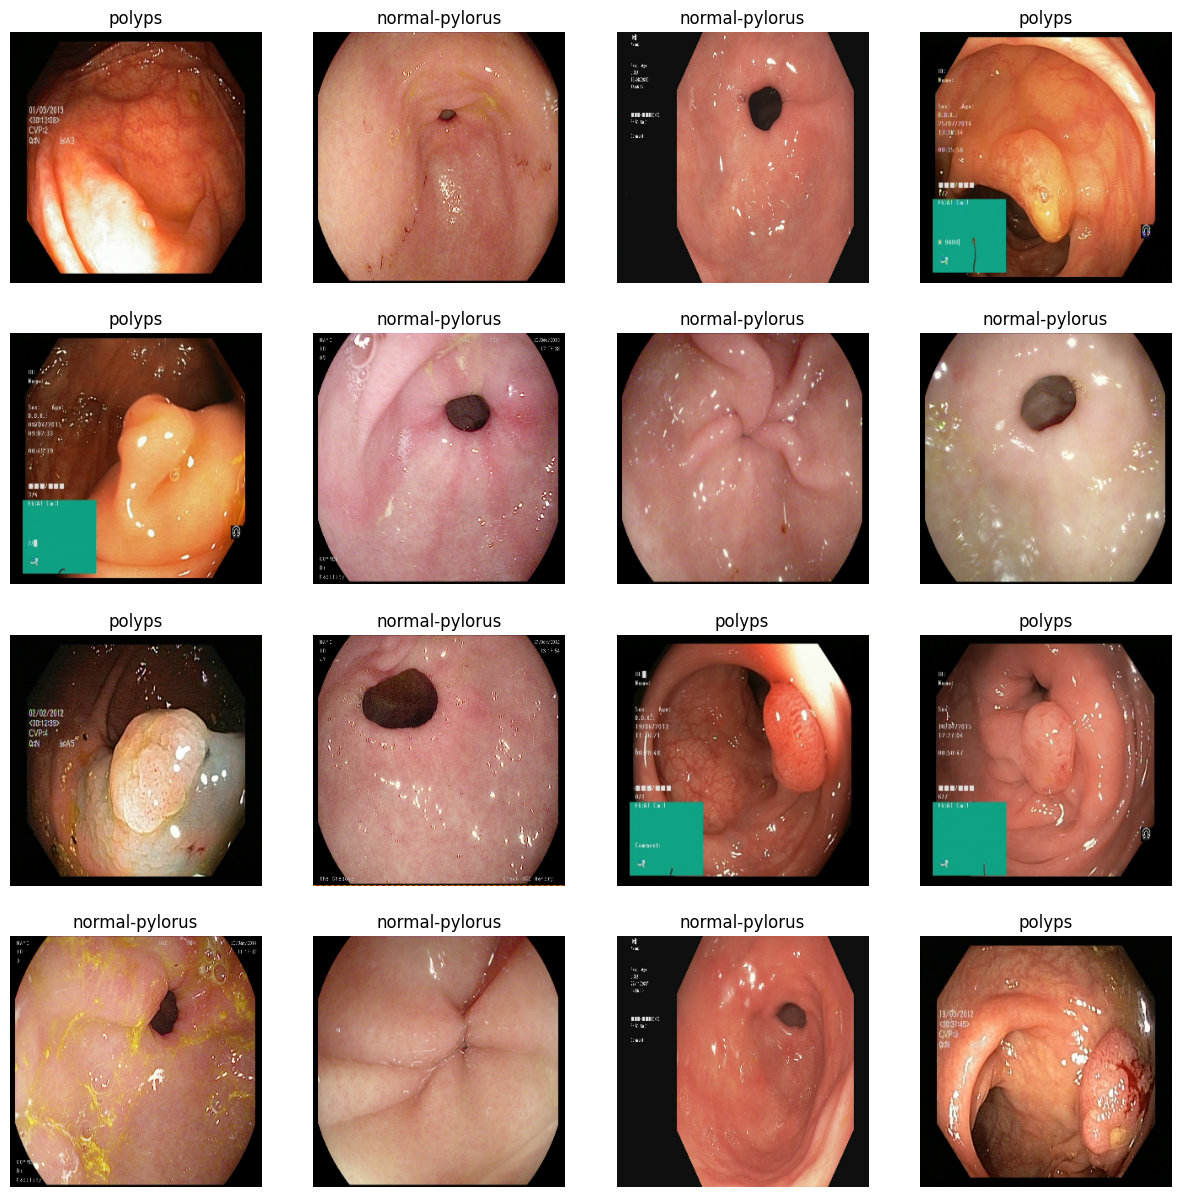

In [7]:
#image plot

plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(training_data.class_names[labels[i]])
    plt.axis('off')

In [8]:
training_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Architecture and Training

In [9]:
num_classes = len(training_data.class_names)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(299, 299, 3)))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)
epochs = 50

history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs,
                    callbacks=[checkpoint])

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 18.4605 - accuracy: 0.9386
Epoch 1: val_accuracy improved from -inf to 0.97744, saving model to best_model.keras
88/88 [==============================] - 28s 237ms/step - loss: 18.4605 - accuracy: 0.9386 - val_loss: 0.1529 - val_accuracy: 0.9774
Epoch 2/50
87/88 [============================>.] - ETA: 0s - loss: 0.0866 - accuracy: 0.9820
Epoch 2: val_accuracy improved from 0.97744 to 0.98246, saving model to best_model.keras
88/88 [==============================] - 17s 187ms/step - loss: 0.0863 - accuracy: 0.9822 - val_loss: 0.1005 - val_accuracy: 0.9825
Epoch 3/50
87/88 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9835
Epoch 3: val_accuracy did not improve from 0.98246
88/88 [==============================] - 18s 190ms/step - loss: 0.0642 - accuracy: 0.9829 - val_loss: 0.0979 - val_accuracy: 0.9825
Epoch 4/50
87/88 [============================>.] - ETA: 0s - loss: 0.0562 - accuracy: 0.9835


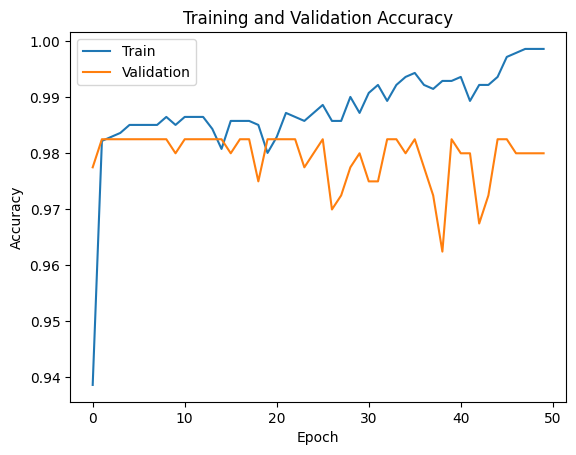

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing for Unseen Data.

In [11]:
# Load the model with the highest validation accuracy
best_model = tf.keras.models.load_model('best_model.keras')

In [12]:
!mkdir kvasir-valid
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1' -O kvasir-validation-dataset.zip
!unzip /content/kvasir-validation-dataset.zip
!mv /content/content/kvasir-validation /content/kvasir-valid
!rm -r /content/content
!rm -r kvasir-valid/kvasir-validation/dyed-resection-margins
!rm -r kvasir-valid/kvasir-validation/dyed-lifted-polyps
!rm -r kvasir-valid/kvasir-validation/normal-pylorus
!rm -r kvasir-valid/kvasir-validation/normal-cecum
!rm -r kvasir-valid/kvasir-validation/normal-z-line
!rm -r kvasir-valid/kvasir-validation/ulcerative-colitis

--2024-01-04 20:06:14--  https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1
Resolving pern-my.sharepoint.com (pern-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to pern-my.sharepoint.com (pern-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1 [following]
--2024-01-04 20:06:16--  https://pern-my.sharepoint.com/personal/m21f0034ai010_fecid_paf-iast_edu_pk/Documents/MS%20AI/4-Spring%202023/Data/kvasir-validation-dataset.zip?ga=1
Reusing existing connection to pern-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 245504250 (234M) [application/x-zip-compressed]
Saving to: ‘kvasir-validation-dataset.zip’

kvasir-validation-d 100%[===================>

In [13]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/kvasir-valid/kvasir-validation',
    image_size=(299, 299),
    batch_size=16,  # Adjust batch size as needed
    shuffle=False,  # Do not shuffle to keep track of filenames and predictions
)

Found 200 files belonging to 2 classes.


In [14]:
# Extract true labels from the directory structure
true_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())

# Convert to numpy array
true_labels = np.array(true_labels)

# Make predictions using the model on the validation dataset
predictions = best_model.predict(validation_dataset)

# Ensure the number of samples matches
num_samples_predictions = len(predictions)
num_samples_true_labels = len(true_labels)

if num_samples_predictions != num_samples_true_labels:
    print(f"Error: Mismatch in the number of samples - Predictions: {num_samples_predictions}, True Labels: {num_samples_true_labels}")
else:
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score, classification_report

    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"\nAccuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

13/13 [==============================] - 2s 144ms/step

Accuracy: 0.985

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [15]:
max_train_accuracy = max(history.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9985724687576294
Maximum Validation Accuracy: 0.9824561476707458


In [16]:
print("Training accuracy list:", history.history['accuracy'])
print("Validation accuracy list:", history.history['val_accuracy'])

Training accuracy list: [0.9386152625083923, 0.9821556210517883, 0.9828693866729736, 0.9835831522941589, 0.9850106835365295, 0.9850106835365295, 0.9850106835365295, 0.9850106835365295, 0.9864382743835449, 0.9850106835365295, 0.9864382743835449, 0.9864382743835449, 0.9864382743835449, 0.9842969179153442, 0.980728030204773, 0.9857245087623596, 0.9857245087623596, 0.9857245087623596, 0.9850106835365295, 0.9800142645835876, 0.9828693866729736, 0.9871520400047302, 0.9864382743835449, 0.9857245087623596, 0.9871520400047302, 0.9885795712471008, 0.9857245087623596, 0.9857245087623596, 0.9900071620941162, 0.9871520400047302, 0.9907209277153015, 0.9921484589576721, 0.9892933368682861, 0.9921484589576721, 0.9935759902000427, 0.9942898154258728, 0.9921484589576721, 0.9914346933364868, 0.9928622245788574, 0.9928622245788574, 0.9935759902000427, 0.9892933368682861, 0.9921484589576721, 0.9921484589576721, 0.9935759902000427, 0.997144877910614, 0.9978586435317993, 0.9985724687576294, 0.998572468757629